# Imperfection

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from qmap import *
from IPython.html.widgets import *
from tqdm import tqdm
from copy import deepcopy
import seaborn as sns
sns.set_style("whitegrid")

/home/lepisma/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
T = 100
P = 20

output = "../../Cloud/Courses/691q/project/presentation/images"

In [4]:
def pl(g):
    markings = get_markings(T, P) # Get oracle output for 100 iterations and 20 items
    markings = mark_all(markings, num=10) # Mark num items
    markings = unmark_one(markings, g) # Unmark one at given pos
#     markings = unmark_one(markings, g, row=1) # Unmark one at given pos
#     markings = unmark_one(markings, g, row=2) # Unmark one at given pos
    markings = unmark_all_noise(markings, [0.2 for i in range(15)], start=20)
    plot_mem(run(markings), markings,
             f"M=5, N={P}. NOISE 0.2", "tmp.pdf")

In [5]:
interact(pl, g=(0, 40))

interactive(children=(IntSlider(value=20, description='g', max=40), Output()), _dom_classes=('widget-interact',))

<function __main__.pl>

## Noise markings mean plots

100%|██████████| 4/4 [03:52<00:00, 58.11s/it]


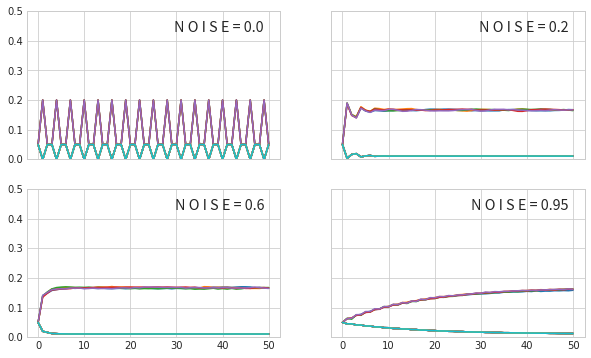

In [6]:
mems_map = {}

probs = [0.0, 0.2, 0.6, 0.95]
for p in tqdm(probs):
    mems = []
    for i in range(10000):
        markings = get_markings(50, P)
        markings = mark_all(markings, num=5)
        markings = unmark_all_noise(markings, [p for j in range(5)], start=0)
        mem = run(markings)
        mems.append(mem)
    mems = np.array(mems)
    mems_map[p] = deepcopy(mems)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.plot((mems_map[probs[i]] ** 2).mean(axis=0))
    ax.set_ylim([0, 0.50])
    ax.text(49, 0.43, f"N O I S E = {probs[i]}", name="Source Sans Pro", size=16, ha="right")

plt.setp([a.get_xticklabels() for a in f.axes[:-2]], visible=False)
plt.savefig(f"{output}/trace-all.pdf")

## Histograms for noisy strategy

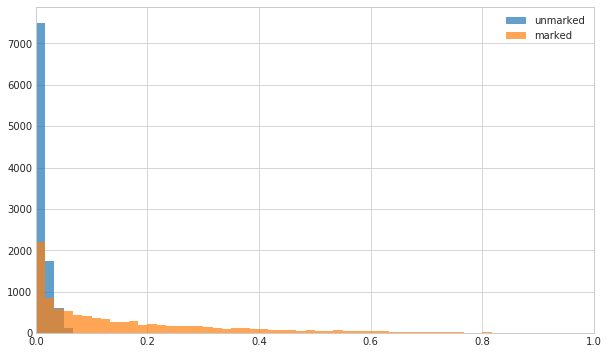

In [7]:
p = probs[1]
fig = plt.figure(figsize=(10, 6))
plt.hist((mems_map[p] ** 2)[:, 10, 5], bins=60,range=(0,1), alpha=0.7, label="unmarked")
plt.hist((mems_map[p] ** 2)[:, 10, 1], bins=60,range=(0,1), alpha=0.7, label="marked")
plt.legend()
plt.xlim([0, 1])
plt.savefig(f"{output}/trace-dist.pdf")

## Trace for varying probabilities

100%|██████████| 10000/10000 [02:00<00:00, 82.93it/s]


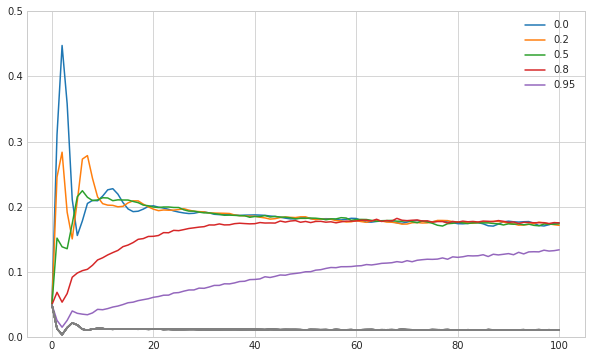

In [8]:
probs = [0.0, 0.2, 0.5, 0.8, 0.95]

mems = []
for i in tqdm(range(10000)):
    markings = get_markings(100, P)
    markings = mark_all(markings, num=5)
    markings = unmark_all_noise(markings, probs, start=0)
    mem = run(markings)
    mems.append(mem)
mems = np.array(mems)

fig = plt.figure(figsize=(10, 6))

for i, p in enumerate(probs):
    plt.plot((mems ** 2)[:, :, i].mean(axis=0), label=f"{p}")
    
for i in range(len(probs), P):
    plt.plot((mems ** 2)[:, :, i].mean(axis=0), color="gray")
    
plt.ylim([0, 0.50])
plt.legend()
plt.savefig(f"{output}/trace-varying.pdf")